In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
#find the train and test data from the following link
train_df  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )
test_df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')

In [3]:
#checking information about the train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [4]:
#checking information about the test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     201 non-null    int64
 1   HHI            201 non-null    int64
 2   HHDL           201 non-null    int64
 3   Married        201 non-null    int64
 4   CollegGrads    201 non-null    int64
 5   AHHAge         201 non-null    int64
 6   Cars           201 non-null    int64
 7   Filed in 2017  201 non-null    int64
 8   Filed in 2016  201 non-null    int64
 9   Filed in 2015  201 non-null    int64
dtypes: int64(10)
memory usage: 15.8 KB


### Exploratory Data Analysis

In [5]:
train_df.describe(include='all')

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Independent
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269
mean,502.241594,155402.688667,-15351.252802,0.971357,2.607721,60.559153,2.435866,0.506849,0.509340,0.516812,NaN
std,288.460068,86788.153213,595184.302049,0.803935,1.675492,25.071219,1.703542,0.500265,0.500224,0.500029,NaN
min,1.000000,185.000000,-999994.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,254.500000,82373.000000,-516765.000000,0.000000,1.000000,38.000000,1.000000,0.000000,0.000000,0.000000,NaN
50%,501.000000,156542.000000,-24440.000000,1.000000,3.000000,60.000000,2.000000,1.000000,1.000000,1.000000,NaN
75%,754.500000,230772.000000,518135.500000,2.000000,4.000000,82.000000,4.000000,1.000000,1.000000,1.000000,NaN


In [6]:

test_df.describe(include='all')

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,503.532338,146021.20398,28027.970149,0.965174,2.547264,60.651741,2.492537,0.512438,0.527363,0.482587
std,296.674907,83432.62547,588184.526824,0.820842,1.737528,23.996210,1.697408,0.501093,0.500497,0.500944
min,4.000000,1418.00000,-993611.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,249.000000,85083.00000,-488672.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000,0.000000
50%,510.000000,137468.00000,73466.000000,1.000000,2.000000,61.000000,3.000000,1.000000,1.000000,0.000000
75%,748.000000,220331.00000,529624.000000,2.000000,4.000000,79.000000,4.000000,1.000000,1.000000,1.000000
max,990.000000,299700.00000,985448.000000,2.000000,5.000000,105.000000,5.000000,1.000000,1.000000,1.000000


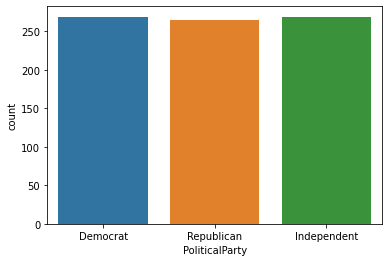

In [7]:
sns.countplot(train_df['PoliticalParty'])

In [8]:
train_df.tail()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
798,476,153304,971909,0,1,99,5,1,0,0,Democrat
799,657,136652,-184616,1,2,31,3,1,0,0,Democrat
800,596,51066,-900262,1,1,67,4,0,0,0,Democrat
801,561,123721,-51448,2,0,23,4,0,1,1,Republican
802,635,189020,839546,2,4,56,1,0,0,0,Republican


In [9]:
test_df.tail()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
196,51,138204,144986,1,1,63,1,1,1,0
197,705,73250,-810927,0,5,40,1,1,0,1
198,542,134376,352116,0,2,86,1,1,0,0
199,929,70820,260337,0,3,78,3,1,0,1
200,528,114510,930683,2,1,38,0,0,0,1


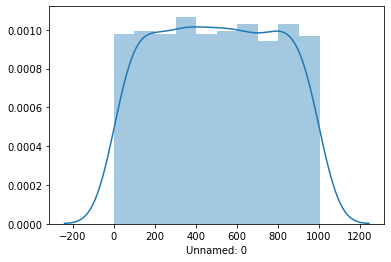

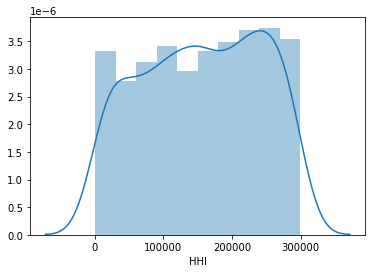

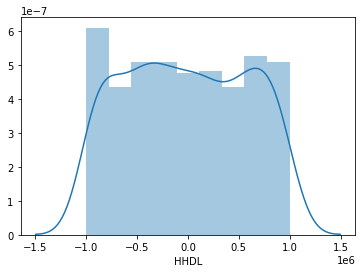

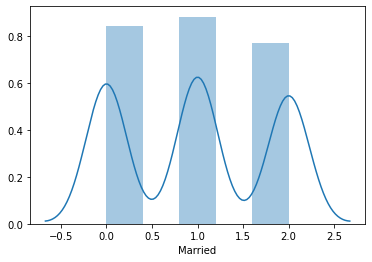

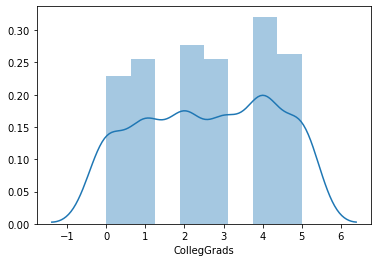

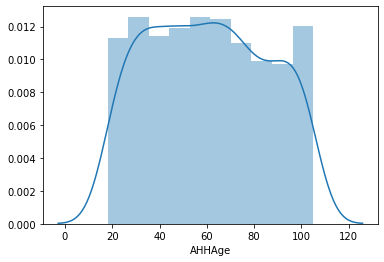

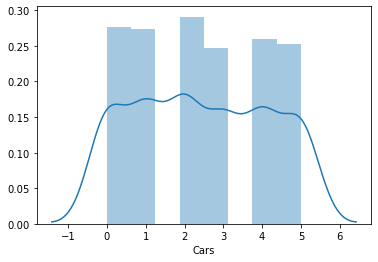

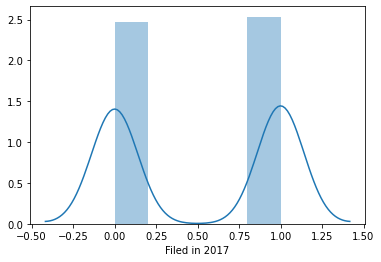

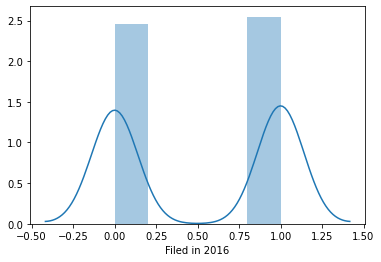

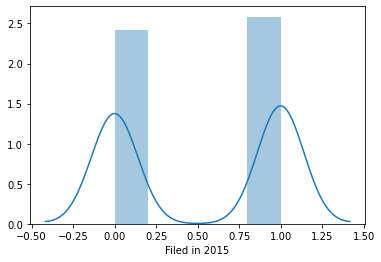

In [10]:
for i in train_df.columns[:-1]:
    sns.distplot(train_df[i]);
    plt.show()


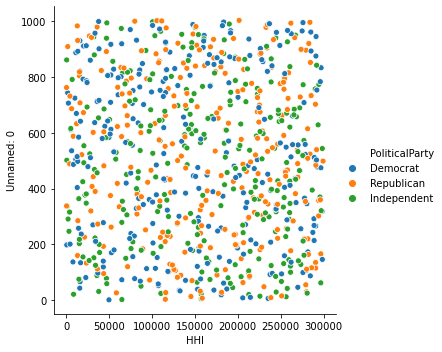

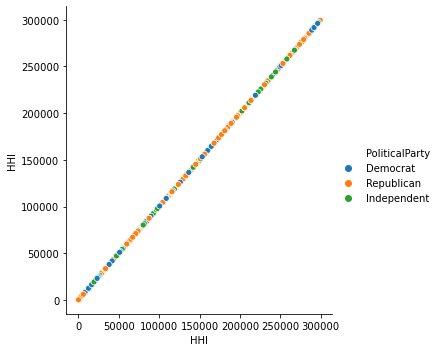

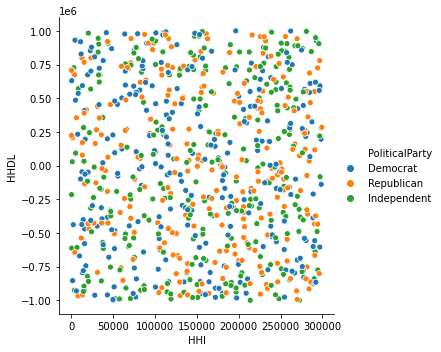

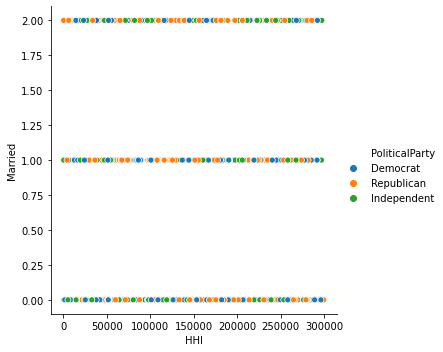

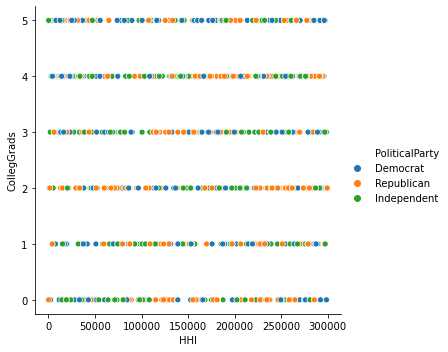

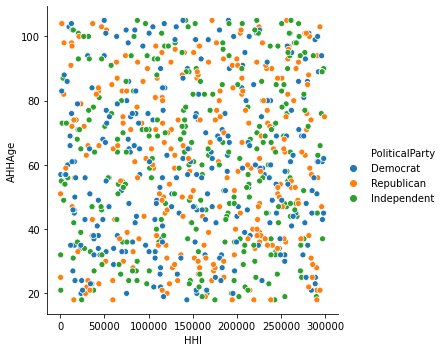

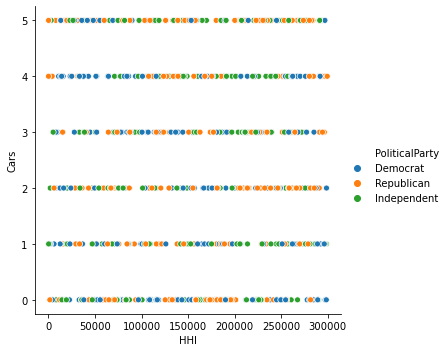

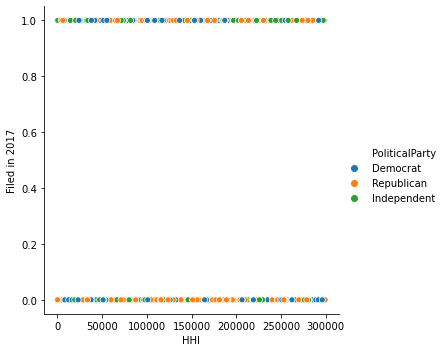

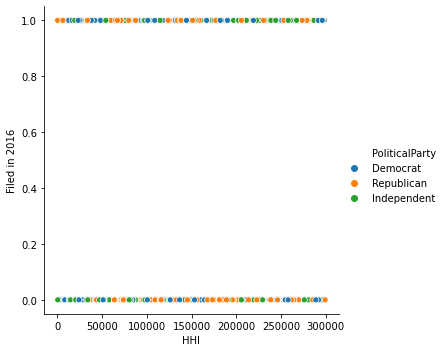

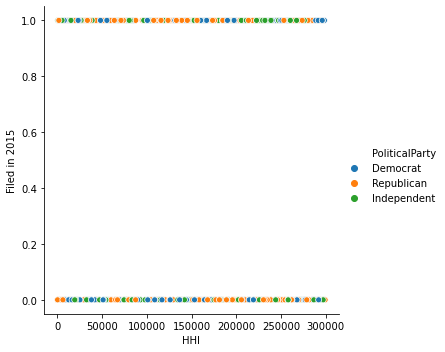

In [11]:
for i in train_df.columns[:-1]:
    sns.relplot(x="HHI", y=i, hue="PoliticalParty", data=train_df);
    plt.show()


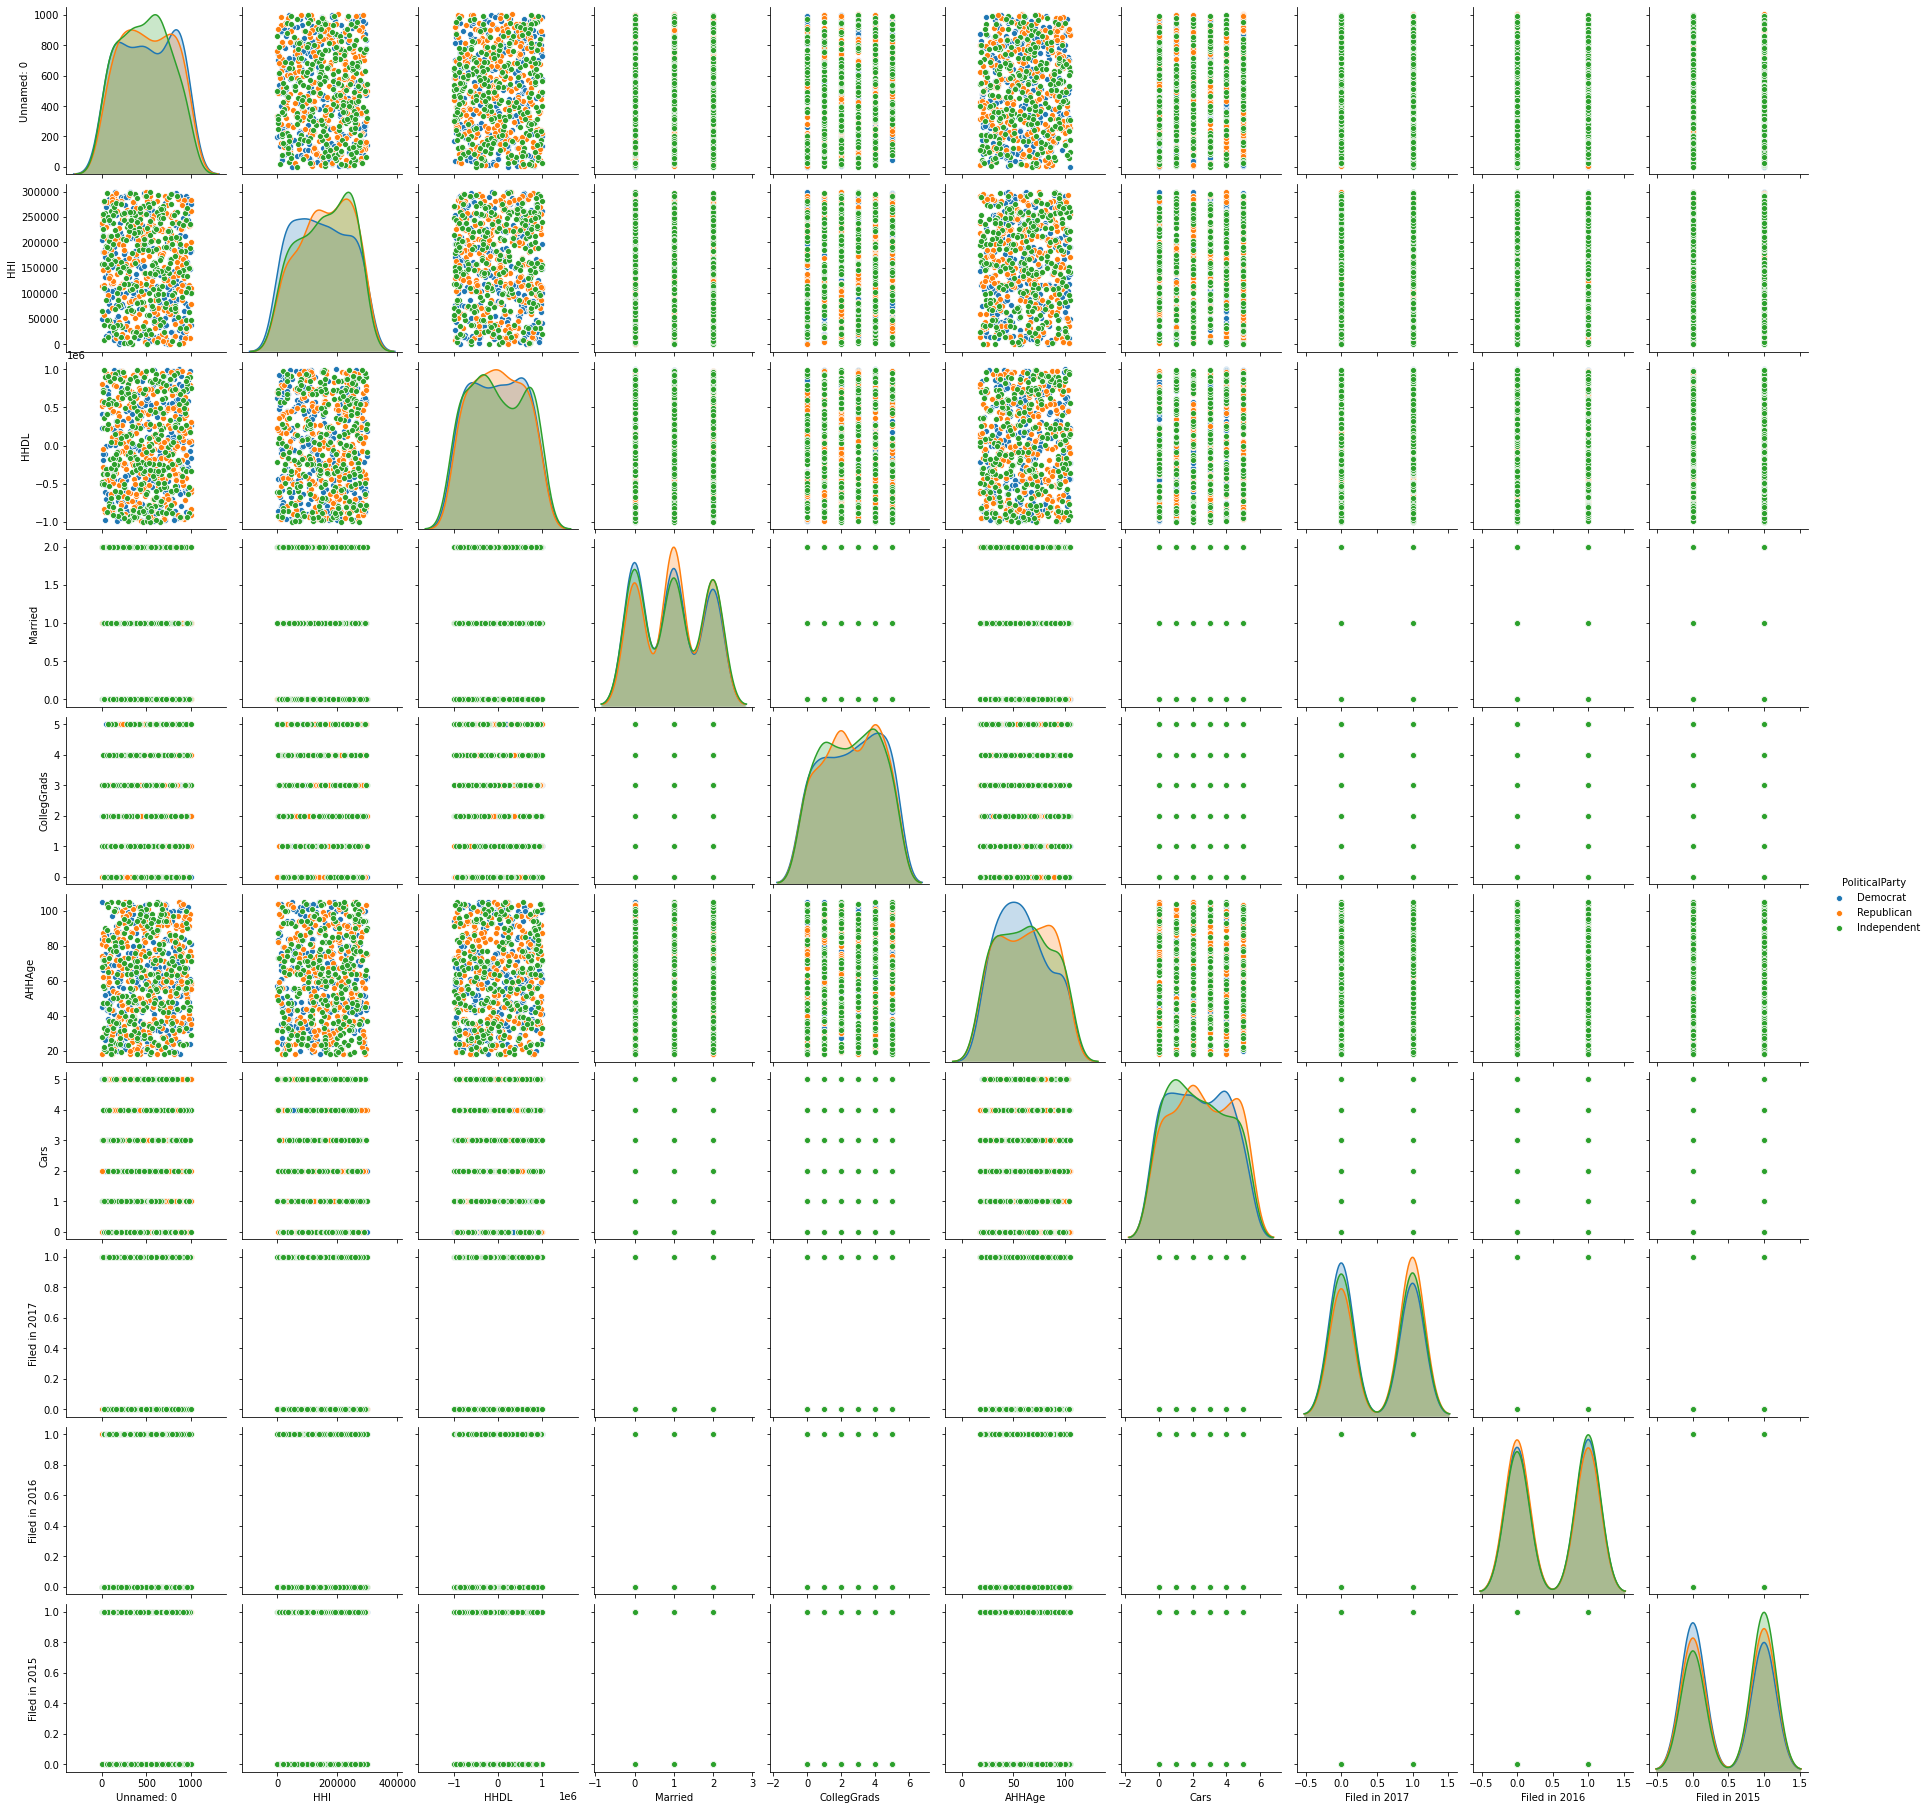

In [12]:
sns.pairplot(train_df,hue='PoliticalParty');

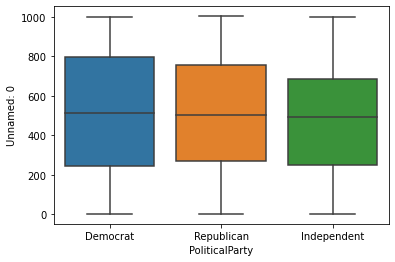

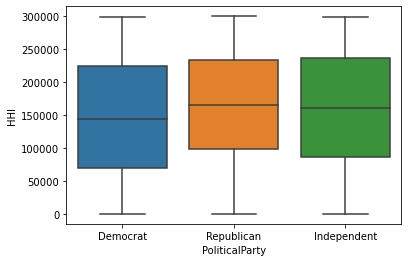

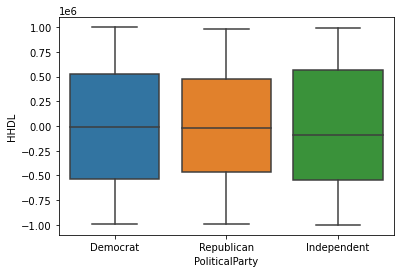

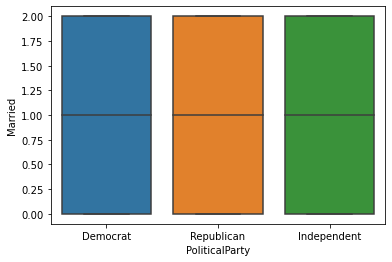

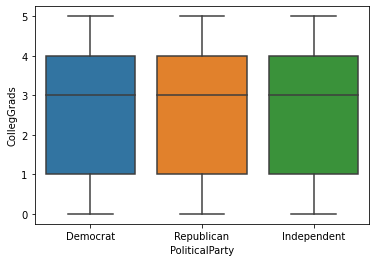

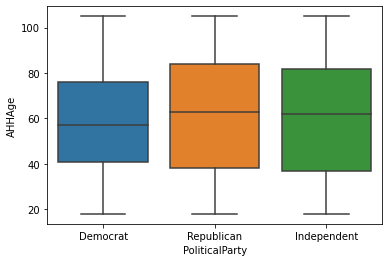

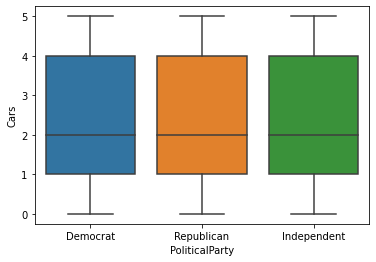

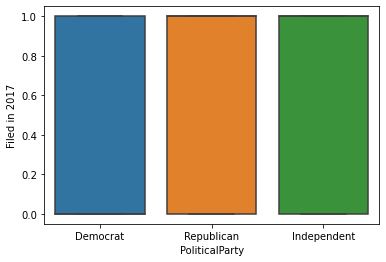

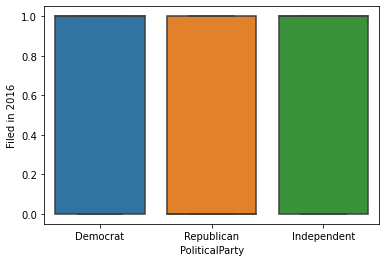

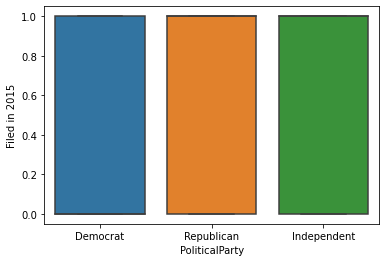

In [13]:

for i in train_df.columns[:-1]:
    sns.boxplot(x='PoliticalParty',y=i,data=train_df);
    plt.show()

### Model Building

In [14]:
label_encoder = LabelEncoder() 
train_df['PoliticalParty']= label_encoder.fit_transform(train_df['PoliticalParty']) 
train_df['PoliticalParty'].unique() 

array([0, 2, 1])

In [15]:
X=train_df.drop(['PoliticalParty','Unnamed: 0'],axis=1)
test_df=test_df.drop('Unnamed: 0',axis=1)
y=train_df['PoliticalParty']

In [16]:
from sklearn.feature_selection import VarianceThreshold
df_var = VarianceThreshold()
df_var.fit_transform(X)
for feature in zip(X.columns, df_var.variances_):
    print(feature)

('HHI', 299189.0)
('HHDL', 1999622.0)
('Married', 0.6455058784849469)
('CollegGrads', 2.8037760018858298)
('AHHAge', 87.0)
('Cars', 2.89843969299436)
('Filed in 2017', 0.24995308688309245)
('Filed in 2016', 0.24991276486525474)
('Filed in 2015', 0.2497173581634251)


In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
test_df=pd.DataFrame(scaler.fit_transform(test_df),columns=test_df.columns)

### Decision Tree Algorithm

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from numpy.random import seed
seed(0)
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(X[['HHDL','HHI','AHHAge','CollegGrads','Filed in 2017','Filed in 2016','Married']],y,test_size = 0.2,random_state=21,stratify=y)
dt=DecisionTreeClassifier(criterion='gini',max_depth=14)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=14)

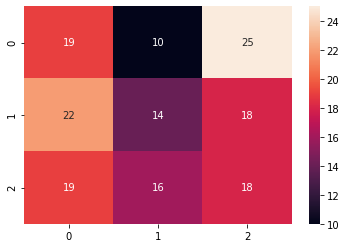

In [19]:
pred=dt.predict(X_test)
cm=confusion_matrix(Y_test,pred)
sns.heatmap(cm,annot=True);

In [20]:
accuracy_score(Y_test,pred)

0.3167701863354037

In [21]:
pred=dt.predict(test_df[['HHDL','HHI','AHHAge','CollegGrads','Filed in 2017','Filed in 2016','Married']])
#pred=tree.predict(test_df)
df=pd.DataFrame({"prediction":pred})
df['label']=df['prediction'].replace({0:"Democrat",2:"Republican",1:"Independent"})
df1=pd.DataFrame({"prediction":df['label']})
df1.to_csv("dt.csv",index=False)


### Random Forest Algorithm

In [22]:
rf=RandomForestClassifier(random_state=21)
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=21)

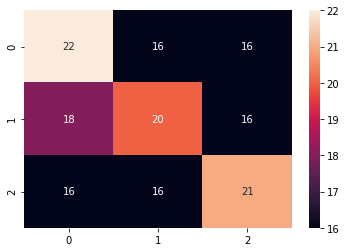

In [23]:
pred=rf.predict(X_test)
cm=confusion_matrix(Y_test,pred)
sns.heatmap(cm,annot=True);

In [24]:
accuracy_score(Y_test,pred)

0.391304347826087

In [25]:
pred=rf.predict(test_df[['HHDL','HHI','AHHAge','CollegGrads','Filed in 2017','Filed in 2016','Married']])
df=pd.DataFrame({"prediction":pred})
df['label']=df['prediction'].replace({0:"Democrat",2:"Republican",1:"Independent"})
df1=pd.DataFrame({"prediction":df['label']})
df1.to_csv("rf.csv",index=False)
